<b>Clustering of Credit Card Customers<b>

Clustering is the process of dividing a company's customers into groups or clusters that reflect similarity among customers in that group.

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Credit Card Customer Data.csv")

In [3]:
df=data.copy()
df.shape

(660, 7)

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
df[df.duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [7]:
df.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

In [8]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


<AxesSubplot:>

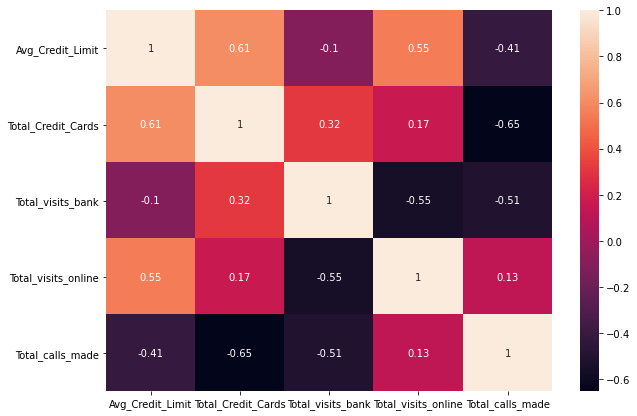

In [9]:
#finding correlations among columns

corrmat= df.corr()
plt.figure(figsize=(10,7))  
sns.heatmap(corrmat,annot=True)

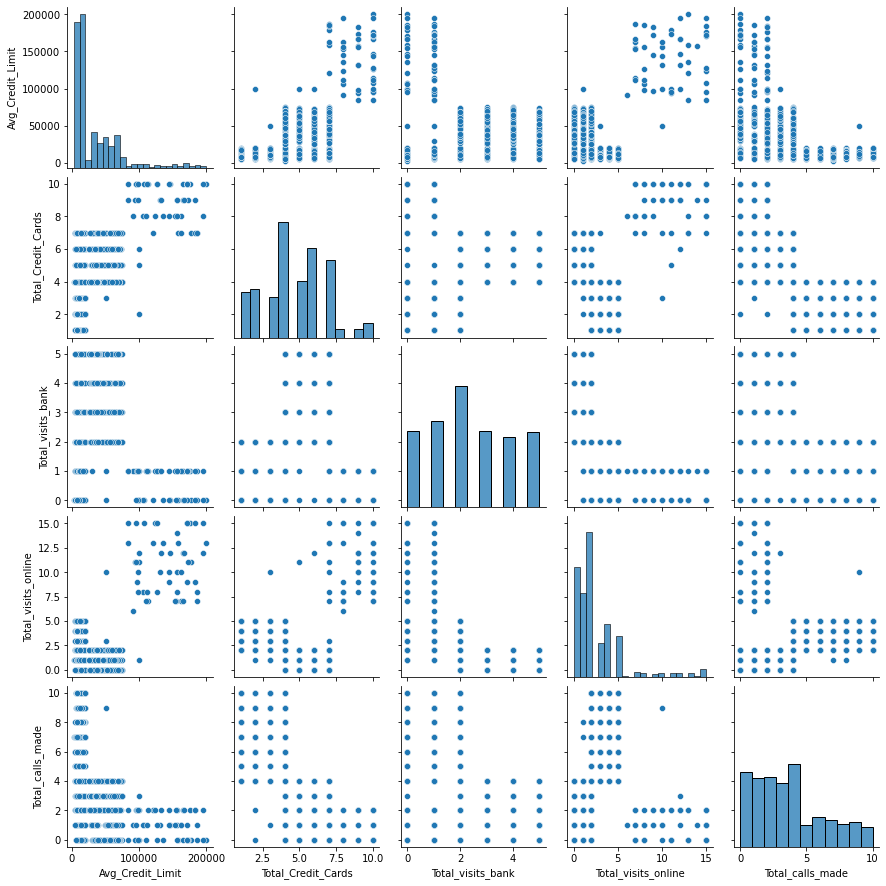

In [10]:
sns.pairplot(df)

In [11]:
df['Total_interactions'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_interactions'>

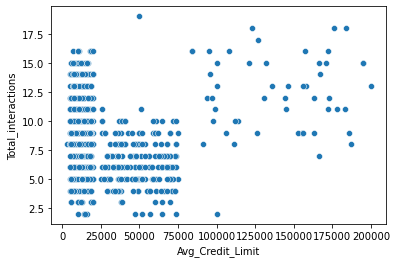

In [12]:
sns.scatterplot(x='Avg_Credit_Limit',y='Total_interactions',data=df)

In [13]:
selected_cols=["Avg_Credit_Limit","Total_Credit_Cards","Total_interactions"]
credit_data=df.loc[:,selected_cols]
credit_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_interactions
0,100000,2,2
1,50000,3,19
2,50000,7,8
3,30000,5,6
4,100000,6,15


In [14]:
#scaling data

scaler= MinMaxScaler()
scaled_data = scaler.fit_transform(credit_data)

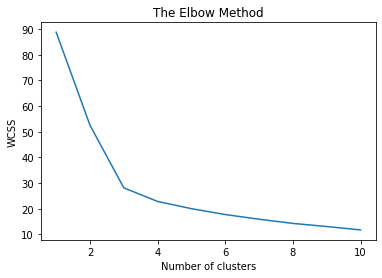

In [15]:
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) 
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

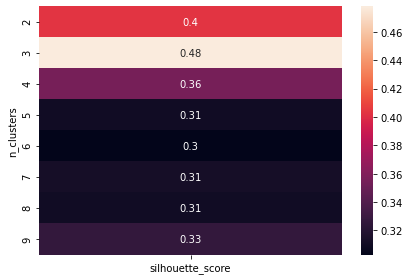

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
clusters_range=range(2,10)
results=[]
for c in clusters_range:
    clusterer = KMeans(init="k-means++",n_clusters=c,n_init=100, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    results.append([c,silhouette_avg])

result=pd.DataFrame(results,columns=["n_clusters","silhouette_score"])
pivot_km=pd.pivot_table(result,index="n_clusters",values="silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True)
plt.tight_layout()
    

From the elbow method and silhouette score, optimal number of clusters = 3

<b>K-Means Clustering<b>

In [17]:
data_kmeans=pd.DataFrame(scaled_data, columns = ['Avg_Credit_Limit','Total_Credit_Cards','Total_Interactions'])
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_kmeans)
cluster_kmeans = pd.DataFrame(y_kmeans,columns=['Cluster_kmeans'])
df=pd.concat([df,cluster_kmeans["Cluster_kmeans"]],axis=1)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_interactions,Cluster_kmeans
0,100000,2,1,1,0,2,1
1,50000,3,0,10,9,19,0
2,50000,7,1,3,4,8,1
3,30000,5,1,1,4,6,1
4,100000,6,0,12,3,15,2


<AxesSubplot:xlabel='Cluster_kmeans', ylabel='Avg_Credit_Limit'>

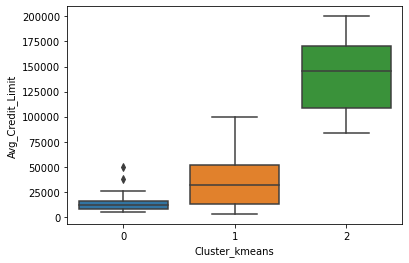

In [18]:
sns.boxplot(x=df["Cluster_kmeans"],y=df["Avg_Credit_Limit"],data=df)

<AxesSubplot:xlabel='Cluster_kmeans', ylabel='Total_Credit_Cards'>

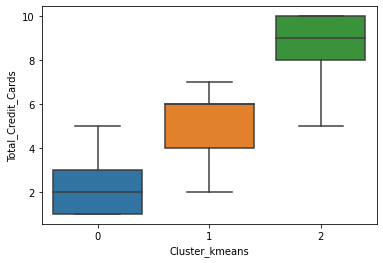

In [19]:
sns.boxplot(x=df["Cluster_kmeans"],y=df["Total_Credit_Cards"],data=df)

<AxesSubplot:xlabel='Cluster_kmeans', ylabel='Total_interactions'>

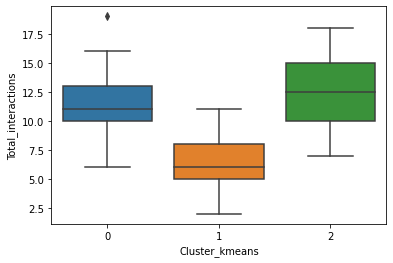

In [20]:
sns.boxplot(x=df["Cluster_kmeans"],y=df["Total_interactions"],data=df)

<b>Hierarichal Clustering<b>

In [22]:
from sklearn.cluster import AgglomerativeClustering
data_hc=pd.DataFrame(scaled_data, columns = ['Avg_Credit_Limit','Total_Credit_Cards','Total_Interactions'])
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc=hc.fit_predict(data_hc)
cluster_hc = pd.DataFrame(y_kmeans,columns=['Cluster_hc'])
df=pd.concat([df,cluster_hc["Cluster_hc"]],axis=1)


In [23]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_interactions,Cluster_kmeans,Cluster_hc
0,100000,2,1,1,0,2,1,1
1,50000,3,0,10,9,19,0,0
2,50000,7,1,3,4,8,1,1
3,30000,5,1,1,4,6,1,1
4,100000,6,0,12,3,15,2,2


<AxesSubplot:xlabel='Cluster_hc', ylabel='Avg_Credit_Limit'>

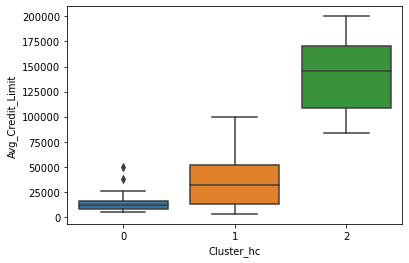

In [24]:
sns.boxplot(x=df["Cluster_hc"],y=df["Avg_Credit_Limit"],data=df)

<AxesSubplot:xlabel='Cluster_hc', ylabel='Total_Credit_Cards'>

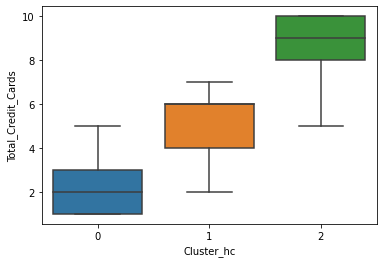

In [25]:
sns.boxplot(x=df["Cluster_hc"],y=df["Total_Credit_Cards"],data=df)

<AxesSubplot:xlabel='Cluster_hc', ylabel='Total_interactions'>

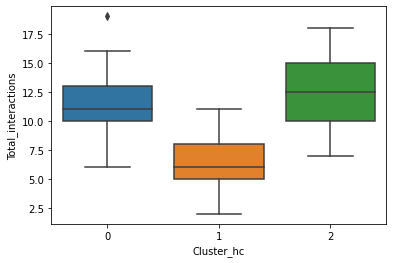

In [26]:
sns.boxplot(x=df["Cluster_hc"],y=df["Total_interactions"],data=df)

In [28]:
from sklearn.metrics import silhouette_score
kmeans_score= silhouette_score(scaled_data,y_kmeans)
kmeans_score

0.478026537488386

In [29]:
hc_score= silhouette_score(scaled_data,y_hc)
hc_score

0.44060285346280026

<b>Conclusion<b>

1. Segment 0 has lowest credit limit and total credit cards but requires a good amount of total interactions
2. Segment 1 has higher credit limit and total credit cards than Segment 0 but requires a least amount of total interactions
3. Segment 2 has highest credit limit and total credit cards but requires a similar amount of total interactions as Segment 0